### Stock market prediction is the act of trying to determine the future value of a company stock or other financial instrument traded on an exchange. 
This notebook explores data from the stock market, particularly some technology stocks such as Apple, Amazon and Oracle.

The datasets are taken from Kaggle.com and data visualization using Matplotlib is done to analyze different aspects of the data. The risks of a stock are  based on analysing its previous performance history.

Future stock prices are predicted through a Time Series Forcasting method, `ThetaForcaster`, using `sktime` library.

### IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

### READING DATASETS

In [3]:
df={}
#Dataset of APPLE
df["AAPL"]=pd.read_csv(r"C:\Users\Garima\Downloads\archive (12)\individual_stocks_5yr\individual_stocks_5yr\AAPL_data.csv")
#Dataset of AMAZON
df["AMZN"]=pd.read_csv(r"C:\Users\Garima\Downloads\archive (12)\individual_stocks_5yr\individual_stocks_5yr\AMZN_data.csv")
#Dataset of ORACLE
df["ORCL"]=pd.read_csv(r"C:\Users\Garima\Downloads\archive (12)\individual_stocks_5yr\individual_stocks_5yr\ORCL_data.csv")

### EDA, TRAIN-TEST-SPLIT AND PREDICTION CODE USED FOR ALL 3 STOCK PREDICTIONS

In [4]:
def StockPred(Name,n):
    
    display(Markdown('___Shape :___'))
    display(df[n].shape)
    
    display(Markdown('___Head :___'))
    display(df[n].head())
    
    display(Markdown('___Tail :___'))   
    display(df[n].tail())
    
    display(Markdown('___Info :___'))
    display(df[n].info())
    
    display(Markdown('___Count of NULL values :___'))
    display(df[n].isna().sum())
    
    display(Markdown('___Statistical details :___'))
    display(df[n].describe())

    display(Markdown('___Visualizing the opening prices of the data :___'))
    plt.figure(figsize=(16,8))
    plt.title(Name)
    plt.xlabel('Days')
    plt.ylabel('Opening Price USD ($)')
    plt.plot(df[n]['open'])
    plt.show()

    display(Markdown('___Visualizing the closing prices of the data :___'))
    plt.figure(figsize=(16,8))
    plt.title(Name)
    plt.xlabel('Days')
    plt.ylabel('Closing Price USD ($)')
    plt.plot(df[n]['close'])
    plt.show()

    display(Markdown('___Visualizing the high prices of the data :___'))
    plt.figure(figsize=(16,8))
    plt.title(Name)
    plt.xlabel('Days')
    plt.ylabel('High Price USD ($)')
    plt.plot(df[n]['high'])
    plt.show()

    display(Markdown('___Visualizing the low prices of the data :___'))
    plt.figure(figsize=(16,8))
    plt.title(Name)
    plt.xlabel('Days')
    plt.ylabel('Low Price USD ($)')
    plt.plot(df[n]['low'])
    plt.show()
    
    y = df[n]['close']

    #Train-Test-Split
    y_train, y_test = temporal_train_test_split(y, test_size=0.1)
    fh = ForecastingHorizon(y_test.index, is_relative=False)
    
    #ThetaForecaster Model (A Time Forecasting Model using sktime)
    forecaster = ThetaForecaster(sp=350) 
    forecaster.fit(y_train)
    y_pred = forecaster.predict(fh)
    
    #Calculating Mean absolute percentage error
    display(Markdown('___Mean absolute percentage error :___'))
    e=mean_absolute_percentage_error(y_test, y_pred)
    print(e)
    
    #Calculating the Accuracy of model
    display(Markdown('___Accuracy :___'))
    print(f"{(1-e)*100} %")
    
    #Plotting the final predicted values over the given data   
    plt.figure(figsize=(16,8))
    plt.title("Model")
    plt.xlabel('Days')
    plt.ylabel('Close Price USD ($)')
    plt.plot(range(len(y)),y)
    plt.plot(range(len(y_train),len(y)),y_pred)
    plt.legend(["Original","Predicted"])
    plt.show()       

### STOCK PREDICTION FOR APPLE

___Shape :___

(1259, 7)

___Head :___

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


___Tail :___

,date,open,high,low,close,volume,Name
1254,2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL
1255,2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL
1256,2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL
1257,2018-02-06,154.830,163.72,154.0000,163.03,68243838,AAPL
1258,2018-02-07,163.085,163.40,159.0685,159.54,51608580,AAPL


___Info :___

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


None

___Count of NULL values :___

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

___Statistical details :___

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


___Visualizing the opening prices of the data :___

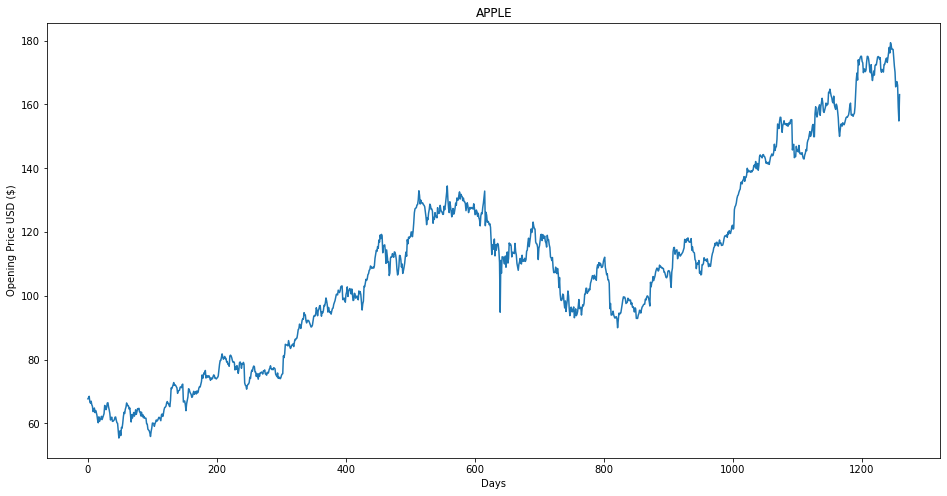

___Visualizing the closing prices of the data :___

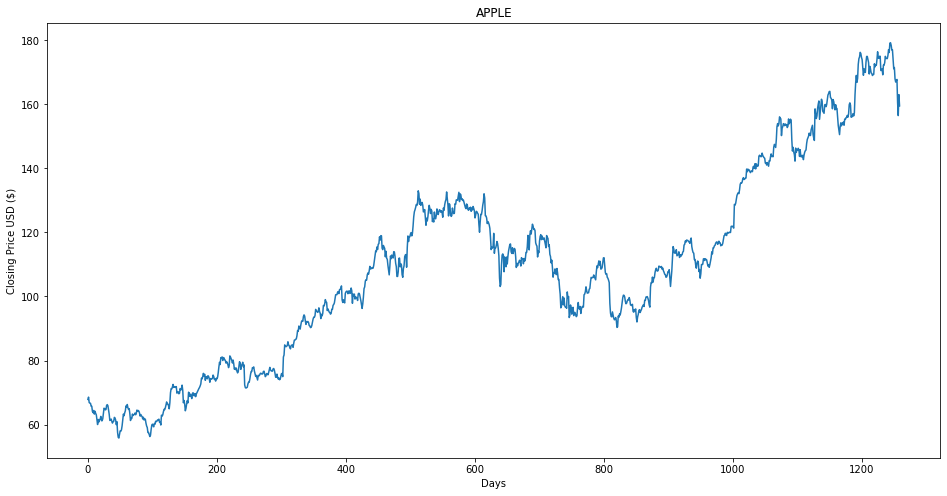

___Visualizing the high prices of the data :___

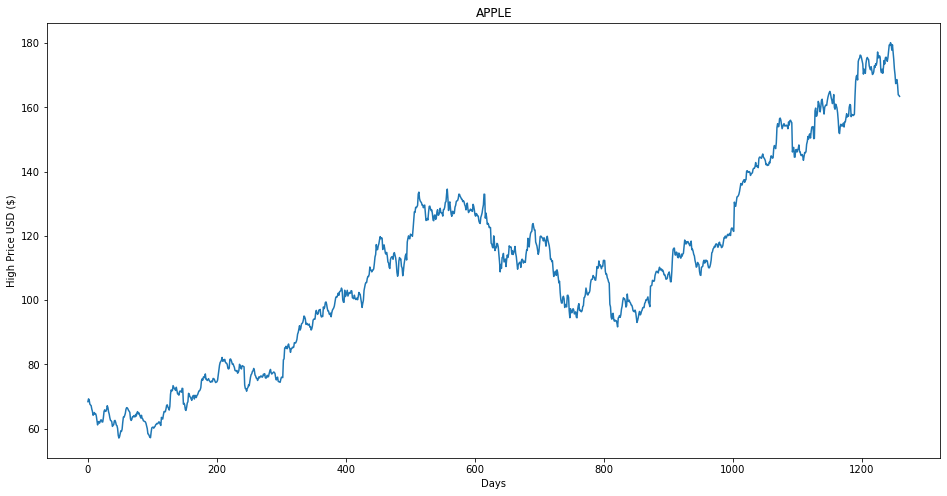

___Visualizing the low prices of the data :___

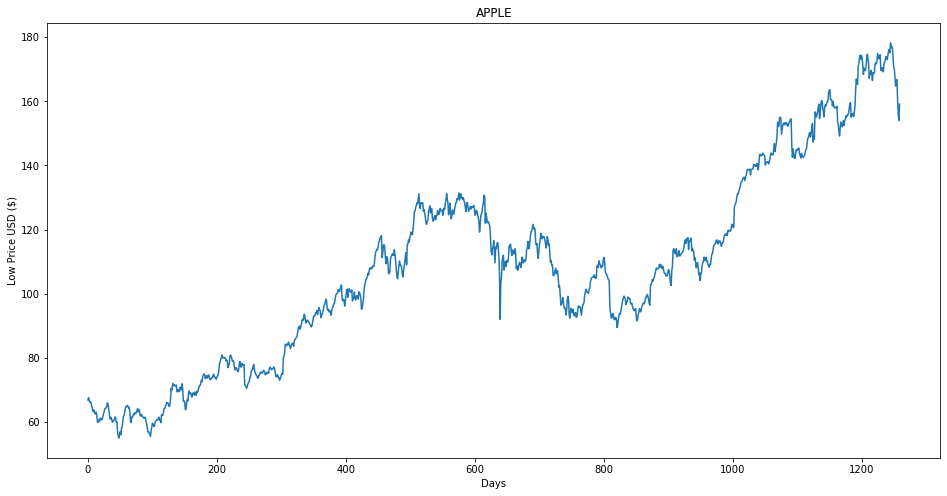

___Mean absolute percentage error :___

0.03750977175222884


___Accuracy :___

96.24902282477711 %


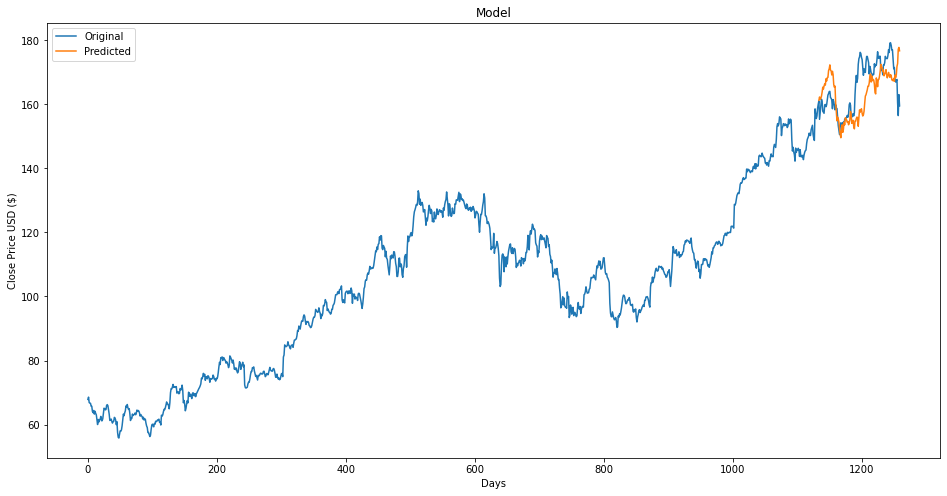

In [5]:
StockPred("APPLE","AAPL")

### STOCK PREDICTION FOR AMAZON

___Shape :___

(1259, 7)

___Head :___

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


___Tail :___

,date,open,high,low,close,volume,Name
1254,2018-02-01,1445.00,1459.88,1385.14,1390.00,9113808,AMZN
1255,2018-02-02,1477.39,1498.00,1414.00,1429.95,11125722,AMZN
1256,2018-02-05,1402.62,1458.98,1320.72,1390.00,11494985,AMZN
1257,2018-02-06,1361.46,1443.99,1351.79,1442.84,11066819,AMZN
1258,2018-02-07,1449.00,1460.99,1415.15,1416.78,7162741,AMZN


___Info :___

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


None

___Count of NULL values :___

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

___Statistical details :___

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,576.867264,582.017221,571.113517,576.880041,3.730465e+06
std,282.500019,284.417123,280.215237,282.500395,2.166506e+06
min,248.940000,252.930000,245.750000,248.230000,1.092970e+06
25%,325.870000,329.485000,322.185000,325.800000,2.511165e+06
50%,506.000000,512.330000,495.640000,503.820000,3.144719e+06
75%,777.620000,781.845000,770.720000,777.420000,4.220246e+06
max,1477.390000,1498.000000,1450.040000,1450.890000,2.385606e+07


___Visualizing the opening prices of the data :___

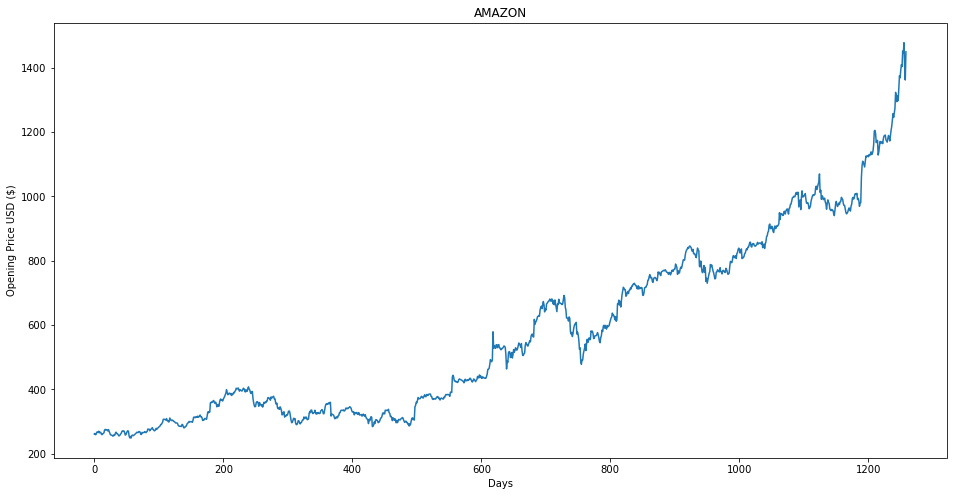

___Visualizing the closing prices of the data :___

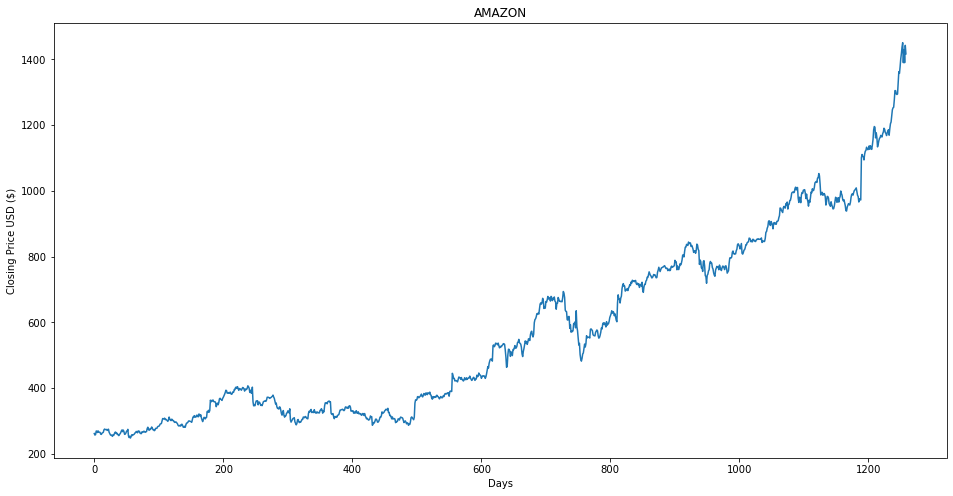

___Visualizing the high prices of the data :___

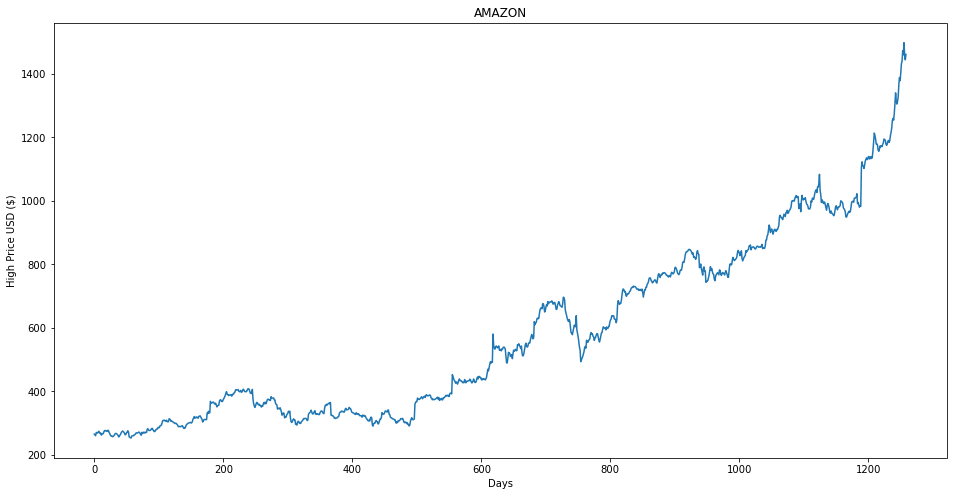

___Visualizing the low prices of the data :___

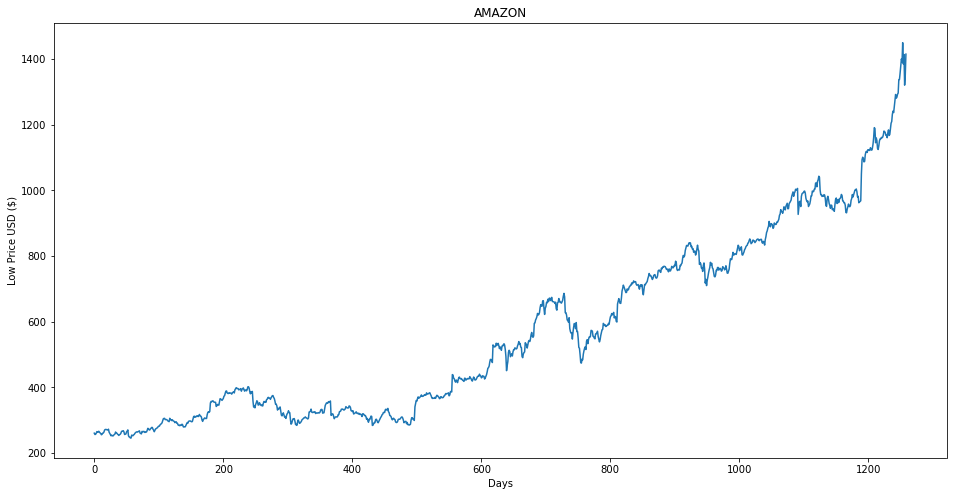

___Mean absolute percentage error :___

0.07486442632290813


___Accuracy :___

92.51355736770918 %


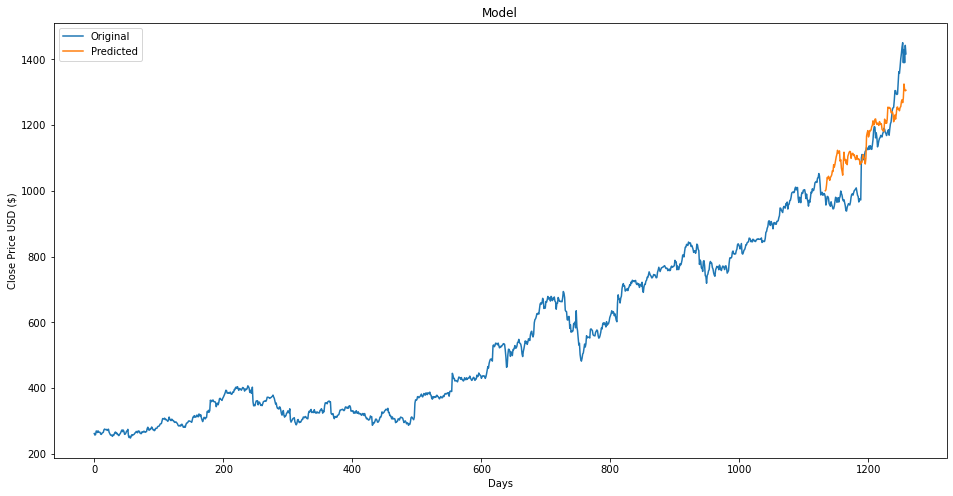

In [6]:
StockPred("AMAZON","AMZN")

### STOCK PREDICTION FOR ORACLE

___Shape :___

(1257, 7)

___Head :___

,date,open,high,low,close,volume,Name
0,2013-02-08,34.76,34.98,34.50,34.90,19255621,ORCL
1,2013-02-11,34.98,35.04,34.55,34.96,12648514,ORCL
2,2013-02-12,34.89,35.25,34.85,35.11,14665754,ORCL
3,2013-02-13,35.21,35.26,34.88,34.99,13176762,ORCL
4,2013-02-14,34.87,35.07,34.69,34.90,15886750,ORCL


___Tail :___

,date,open,high,low,close,volume,Name
1252,2018-02-01,51.36,51.98,51.2600,51.63,11674132,ORCL
1253,2018-02-02,51.25,51.41,50.0400,50.13,17562215,ORCL
1254,2018-02-05,50.04,50.70,48.0600,48.09,19725751,ORCL
1255,2018-02-06,47.33,49.51,46.8101,49.40,25921187,ORCL
1256,2018-02-07,49.20,49.85,48.8200,48.87,15138042,ORCL


___Info :___

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1257 non-null   object 
 1   open    1257 non-null   float64
 2   high    1257 non-null   float64
 3   low     1257 non-null   float64
 4   close   1257 non-null   float64
 5   volume  1257 non-null   int64  
 6   Name    1257 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 68.9+ KB


None

___Count of NULL values :___

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

___Statistical details :___

,open,high,low,close,volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,40.368928,40.681892,40.087095,40.386626,1.600364e+07
std,4.920614,4.924134,4.903569,4.907913,1.079239e+07
min,30.050000,30.230000,29.860000,29.960000,4.013115e+06
25%,37.450000,37.850000,37.110000,37.550000,1.065275e+07
50%,40.090000,40.375000,39.840000,40.130000,1.363424e+07
75%,43.310000,43.660000,42.930000,43.260000,1.778670e+07
max,52.760000,53.140000,52.470000,52.800000,1.576747e+08


___Visualizing the opening prices of the data :___

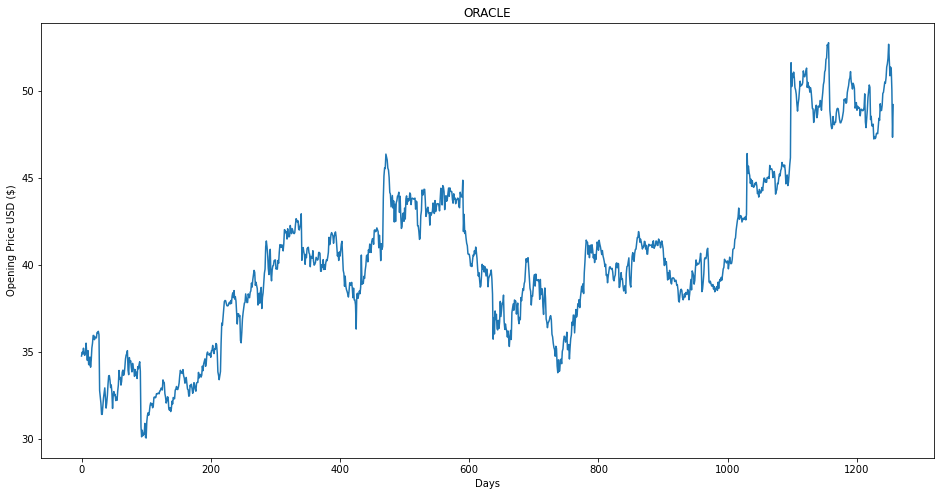

___Visualizing the closing prices of the data :___

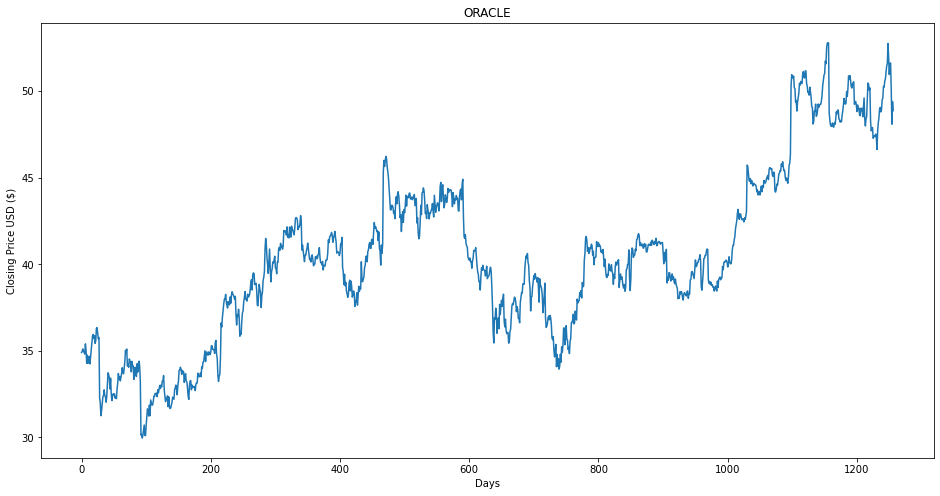

___Visualizing the high prices of the data :___

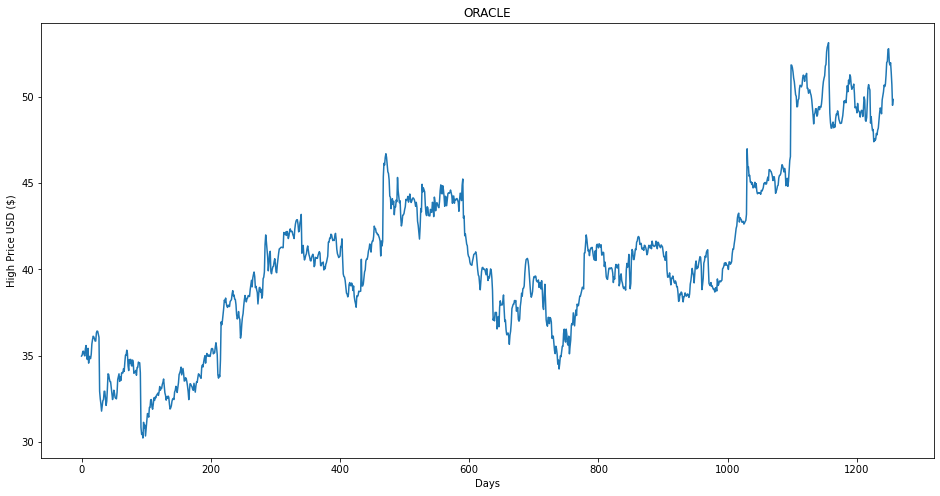

___Visualizing the low prices of the data :___

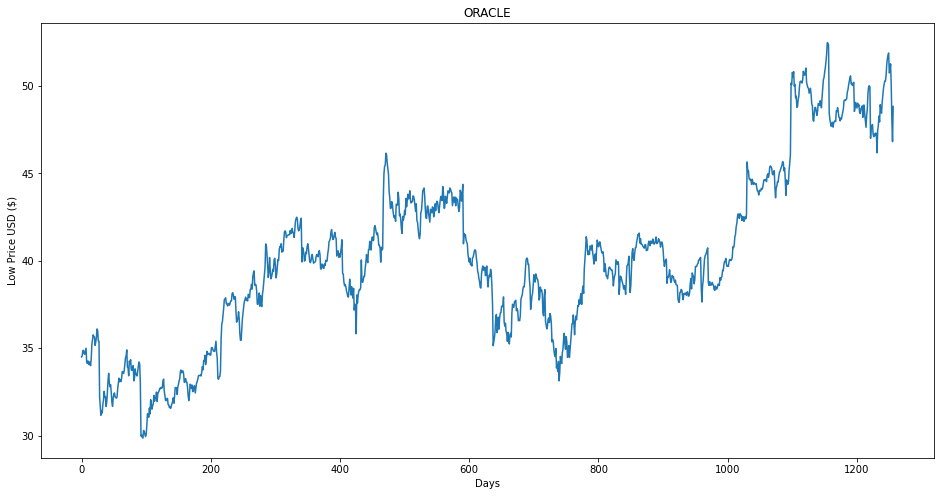

___Mean absolute percentage error :___

0.036285505127076054


___Accuracy :___

96.3714494872924 %


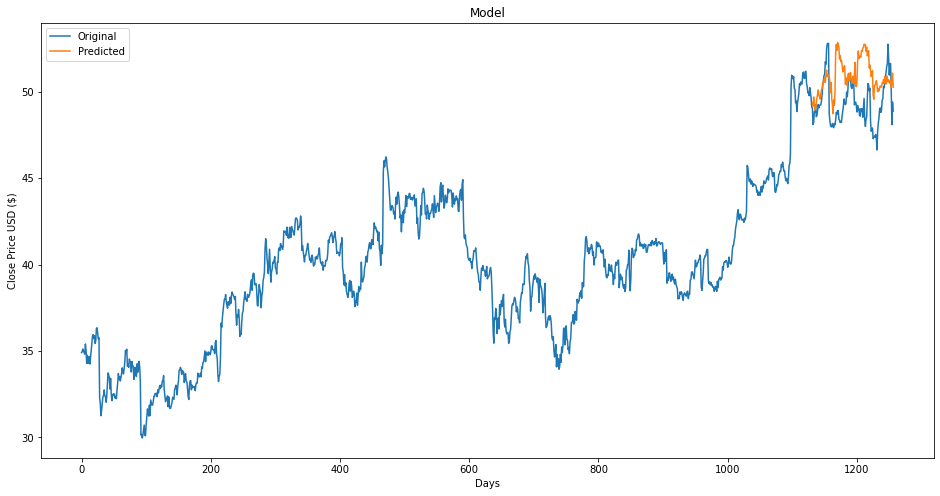

In [7]:
StockPred("ORACLE","ORCL")

#### NOTE :
The efficient-market hypothesis suggests that stock prices reflect all currently available information and any price changes that are not based on newly revealed information thus are **inherently unpredictable**.

Burton Malkiel, in his influential 1973 work A Random Walk Down Wall Street, claimed that stock prices could therefore not be accurately predicted by looking at price history. As a result, Malkiel argued, stock prices are best described by a statistical process called a **"random walk"** meaning each day's deviations from the central value are random and unpredictable. 